# How to survive the Titanic – enabled by Data Science

The titanic sunk upon crashing into an iceberg in the 20th century. In the following we will use its passenger data to predict what type of passenger would have been the most likely to survive (& hopefully gain a lesson or two for our survival!).

# A Data Science Framework

1. **Define the Problem:** If data science, big data, machine learning, predictive analytics, business intelligence, or any other buzzword is the solution, then what is the problem? As the saying goes, don't put the cart before the horse. Problems before requirements, requirements before solutions, solutions before design, and design before technology. Too often we are quick to jump on the new shiny technology, tool, or algorithm before determining the actual problem we are trying to solve.
2. **Gather the Data:** John Naisbitt wrote in his 1984 (yes, 1984) book Megatrends, we are “drowning in data, yet staving for knowledge." So, chances are, the dataset(s) already exist somewhere, in some format. It may be external or internal, structured or unstructured, static or streamed, objective or subjective, etc. As the saying goes, you don't have to reinvent the wheel, you just have to know where to find it. In the next step, we will worry about transforming "dirty data" to "clean data."
3. **Prepare Data for Consumption:** This step is often referred to as data wrangling, a required process to turn “wild” data into “manageable” data. Data wrangling includes implementing data architectures for storage and processing, developing data governance standards for quality and control, data extraction (i.e. ETL and web scraping), and data cleaning to identify aberrant, missing, or outlier data points.
4. **Perform Exploratory Analysis:** Anybody who has ever worked with data knows, garbage-in, garbage-out (GIGO). Therefore, it is important to deploy descriptive and graphical statistics to look for potential problems, patterns, classifications, correlations and comparisons in the dataset. In addition, data categorization (i.e. qualitative vs quantitative) is also important to understand and select the correct hypothesis test or data model.
5. **Model Data:** Like descriptive and inferential statistics, data modeling can either summarize the data or predict future outcomes. Your dataset and expected results, will determine the algorithms available for use. It's important to remember, algorithms are tools and not magical wands or silver bullets. You must still be the master craft (wo)man that knows how-to select the right tool for the job. An analogy would be asking someone to hand you a Philip screwdriver, and they hand you a flathead screwdriver or worst a hammer. At best, it shows a complete lack of understanding. At worst, it makes completing the project impossible. The same is true in data modelling. The wrong model can lead to poor performance at best and the wrong conclusion (that’s used as actionable intelligence) at worst.
6. **Validate and Implement Data Model:** After you've trained your model based on a subset of your data, it's time to test your model. This helps ensure you haven't overfit your model or made it so specific to the selected subset, that it does not accurately fit another subset from the same dataset. In this step we determine if our [model overfit, generalize, or underfit our dataset](http://docs.aws.amazon.com/machine-learning/latest/dg/model-fit-underfitting-vs-overfitting.html).
7. **Optimize and Strategize:** This is the "bionic man" step, where you iterate back through the process to make it better...stronger...faster than it was before. As a data scientist, your strategy should be to outsource developer operations and application plumbing, so you have more time to focus on recommendations and design. Once you're able to package your ideas, this becomes your “currency exchange" rate.

Note: This part is copied from 'A Data Science Framework To Achieve 99% accuracy'

# 1. Define the problem

For this project, the problem statement is given to us on a golden plater, develop an algorithm to predict the survival outcome of passengers on the Titanic.

......

Project Summary: The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

**In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.**

# 2. Gather the data

Similarly, the data is also served on a golden plater with test & train data at [Kaggle's ML from Disaster](https://www.kaggle.com/c/titanic/data).

# Step 3: Prepare Data for Consumption
Since step 2 was provided to us on a golden plater, so is step 3. Therefore, normal processes in data wrangling, such as data architecture, governance, and extraction are out of scope. Thus, only data cleaning is in scope.

## 3.1.1 Import Libraries
The following code is written in Python 3.x. Libraries provide pre-written functionality to perform necessary tasks. The idea is why write ten lines of code, when you can write one line. 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python

#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

# misc libraries
import random
import time


# ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)



# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

Python version: 3.7.7 (default, Mar 26 2020, 10:32:53) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
pandas version: 1.0.3
matplotlib version: 3.1.3
NumPy version: 1.18.1
SciPy version: 1.4.1
IPython version: 7.13.0
scikit-learn version: 0.22.1
-------------------------


## 3.1.2 Import Data-Modelling Libraries
We will use the popular scikit-learn library to develop our machine learning algorithms. In sklearn, algorithms are called Estimators and implemented in their own classes. For data visualization, we will use the matplotlib and seaborn library. Below are common classes to load.

In [2]:
# Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

# Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
import itertools

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import graphviz
from pandas.plotting import scatter_matrix

# Configure Visualization Defaults
# %matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

## 3.2.1 Meet and Greet Data

**Note: Discrete data involves round, concrete numbers that are determined by counting. Continuous data involves complex numbers that are measured across a specific time interval.**

**Note: [Great article on datatypes](https://www.mymarketresearchmethods.com/types-of-data-nominal-ordinal-interval-ratio/)**

**Note: ID Values are encoded nominal data. [Reference](http://www.psy.gla.ac.uk/~steve/best/ordinal.html)**

This is the meet and greet step. Get to know your data by first name and learn a little bit about it. **What does it look like (datatype and values), what makes it tick (independent/feature variables(s)), what's its goals in life (dependent/target variable(s)).** Think of it like a first date, before you jump in and start poking it in the bedroom.

To begin this step, we first import our data. Next we use the info() and sample() function, to get a quick and dirty overview of variable datatypes (i.e. qualitative vs quantitative). 

1. **Survived**: Binary nominal data; 1 for survived/0 for died. All other variables are potential predictor or independent variables. **It's important to note, more predictor variables do not make a better model, but the right variables.**
2. **PassengerID** & **TicketID**: Numerically-encoded nominal data; Random identifiers with no impact on outcome variable.
3. **Pclass**: Ordinal data for ticket-class; proxy for socio-economic status (SES), representing 1 = upper class, 2 = middle class, and 3 = lower class.
4. **Name**: Nominal data; SES could be derived from titles such as Doctor or master
5. **Sex**: Dichotomous nominal data for gender; Will be encoded to numeric data
6. **Embarked**: Nominal data for Port of embarkation; Will be encoded to numeric data
7. **Age**: Continuous Quantitative Data (Ratio data)
8. **Fare**: Continuous Quantitative Data (Ratio data)
9. **SibSp** & **Parch**: Discrete Quantitative Data; No of siblings/spouses & Parents/children. This can be used for feature engineering to create a family size and is alone variable.
10. **Cabin**: Nominal datatype; Can be used in feature engineering for approximate position on ship when the incident occurred and SES from deck levels. However, since there are many null values, it does not add much value.

In [3]:
raw_train = pd.read_csv('data/train.csv')

raw_test  = pd.read_csv('data/test.csv')


# Previewing data
print (raw_train.info())
print(raw_test.info())

# Sampling
raw_train.head() 
raw_train.tail() 
raw_train.sample(10) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
638,639,0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,0,5,3101295,39.6875,NaN,S
594,595,0,2,"Chapman, Mr. John Henry",male,37.0,1,0,SC/AH 29037,26.0000,NaN,S
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.5250,NaN,S
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.2500,NaN,S
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S
216,217,1,3,"Honkanen, Miss. Eliina",female,27.0,0,0,STON/O2. 3101283,7.9250,NaN,S
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
400,401,1,3,"Niskanen, Mr. Juha",male,39.0,0,0,STON/O 2. 3101289,7.9250,NaN,S
620,621,0,3,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,NaN,C
41,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.0,1,0,11668,21.0000,NaN,S


<a id="ch5"></a>
## 3.2.2 Data Cleaning - 4 C's: Correcting, Completing, Creating, and Converting
In this stage, we will clean our data by 1) correcting aberrant values and outliers, 2) completing missing information, 3) creating new features for analysis, and 4) converting fields to the correct format for calculations and presentation.

1. **Correcting:** Reviewing the data, there does not appear to be any aberrant or non-acceptable data inputs. In addition, we see we may have potential outliers in age and fare. However, since they are reasonable values, we will wait until after we complete our exploratory analysis to determine if we should include or exclude from the dataset. It should be noted, that if they were unreasonable values, for example age = 800 instead of 80, then it's probably a safe decision to fix now. However, we want to use caution when we modify data from its original value, because it may be necessary to create an accurate model.
2. **Completing:** There are null values or missing data in the age, cabin, embarked and fare field (Only one for the latter in the test set). Missing values can be bad, because some algorithms don't know how-to handle null values and will fail. While others, like decision trees, can handle null values. Thus, it's important to fix before we start modeling, because we will compare and contrast several models. There are two common methods, either delete the record or populate the missing value using a reasonable input. It is not recommended to delete the record, especially a large percentage of records, unless it truly represents an incomplete record. Instead, it's best to impute missing values. A basic methodology for qualitative data is impute using mode. A basic methodology for quantitative data is impute using mean, median, or mean + randomized standard deviation. An intermediate methodology is to use the basic methodology based on specific criteria; like the average age by class or embark port by fare and SES. There are more complex methodologies, however before deploying, it should be compared to the base model to determine if complexity truly adds value. For this dataset, age will be imputed with the median, the cabin attribute will be dropped, embark will be imputed with mode and fare with the mean. Subsequent model iterations may modify this decision to determine if it improves the model’s accuracy.
3. **Creating:**  Feature engineering is when we use existing features to create new features to determine if they provide new signals to predict our outcome. For this dataset, we will create a title feature to determine if it played a role in survival.
4. **Converting:** Last, but certainly not least, we'll deal with formatting. There are no date or currency formats, but datatype formats. Our categorical data imported as objects, which makes it difficult for mathematical calculations. For this dataset, we will convert object datatypes to categorical dummy variables.

In [4]:
print('Train columns with null values:\n', raw_train.isnull().sum())
print("-"*10)

print('Test/Validation columns with null values:\n', raw_test.isnull().sum())
print("-"*10)

raw_train.describe(include = 'all')

Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------
Test/Validation columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
----------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Brocklebank, Mr. William Alfred",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


This gives us a great overview on what to clean. Note that the 50th percentile is the same as the median.

In [5]:
# COMPLETING

for dataset in [raw_train, raw_test]:
    
    dataset['Age'].fillna(value=dataset['Age'].median(), inplace=True)
    
    dataset['Fare'].fillna(value=dataset['Fare'].mean(), inplace=True)
    
    # [0], as mode returns a df
    dataset['Embarked'].fillna(value=dataset['Embarked'].mode()[0], inplace=True) 
    

drop_columns = ['PassengerId', 'Ticket', 'Cabin']
raw_train.drop(drop_columns, axis=1, inplace=True)

print(raw_train.isnull().sum())
print("-"*10)
print(raw_test.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
----------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [6]:
# CREATING

for dataset in [raw_train, raw_test]:
    
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    
    dataset['IsAlone'] = 1
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0
    
    # Expand returns a DF, we then index into the later containing the title & isolate the title
    dataset['Title'] = dataset['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
    
    # Bins = How many quantiles; QCut: Split evenly; Cut: Split in terms of data (uneven no per bin)
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)
    
print(raw_train['Title'].value_counts())
print("-"*10)

# Setting a minimum to include a title – 5 to include both Dr & Rev, where the former might be very indicative
stat_min = 5

title_names = (raw_train['Title'].value_counts() < stat_min)

raw_train['Title'] = raw_train['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)

print(raw_train['Title'].value_counts())
print("-"*10)

# preview data again
raw_train.info()
raw_test.info()
raw_train.sample(10)

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Capt              1
Sir               1
Jonkheer          1
Don               1
Lady              1
the Countess      1
Ms                1
Mme               1
Name: Title, dtype: int64
----------
Mr        517
Miss      182
Mrs       125
Master     40
Misc       14
Dr          7
Rev         6
Name: Title, dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Name        891 non-null    object  
 3   Sex         891 non-null    object  
 4   Age         891 non-null    float64 
 5   SibSp       891 non-null    int64   
 6   Parch       891 non-null    int64   
 7   

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
149,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,13.0000,S,1,1,Rev,"(7.91, 14.454]","(32.0, 48.0]"
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
140,0,3,"Boulos, Mrs. Joseph (Sultana)",female,28.0,0,2,15.2458,C,3,0,Mrs,"(14.454, 31.0]","(16.0, 32.0]"
401,0,3,"Adams, Mr. John",male,26.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]"
306,1,1,"Fleming, Miss. Margaret",female,28.0,0,0,110.8833,C,1,1,Miss,"(31.0, 512.329]","(16.0, 32.0]"
849,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,28.0,1,0,89.1042,C,2,0,Mrs,"(31.0, 512.329]","(16.0, 32.0]"
328,1,3,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",female,31.0,1,1,20.5250,S,3,0,Mrs,"(14.454, 31.0]","(16.0, 32.0]"
367,1,3,"Moussa, Mrs. (Mantoura Boulos)",female,28.0,0,0,7.2292,C,1,1,Mrs,"(-0.001, 7.91]","(16.0, 32.0]"
495,0,3,"Yousseff, Mr. Gerious",male,28.0,0,0,14.4583,C,1,1,Mr,"(14.454, 31.0]","(16.0, 32.0]"
817,0,2,"Mallet, Mr. Albert",male,31.0,1,1,37.0042,C,3,0,Mr,"(31.0, 512.329]","(16.0, 32.0]"


In [7]:
# CONVERTING

label = LabelEncoder()

for dataset in [raw_train, raw_test]:    
    
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])
    
Target = ['Survived']

# Pretty version for charts train_X & w/ codes for training train_X_Calc
data_X = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 
data_X_Calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare'] 
data_XY =  Target + data_X
print('Original X Y: ', data_XY, '\n')

# X & Y w/ bin features
data_X_bin = ['Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
data_XY_bin = Target + data_X_bin
print('Bin X Y: ', data_XY_bin, '\n')

# X & Y w/ dummies
data_dummy = pd.get_dummies(raw_train[data_X])
data_X_dummy = data_dummy.columns.tolist()
data_XY_dummy = Target + data_X_dummy
print('Dummy X Y: ', data_XY_dummy)


#raw_train.sample(10)

Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 

Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 

Dummy X Y:  ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Dr', 'Title_Master', 'Title_Misc', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rev']


## 3.2.3 Cleaned Data Double-Check

Now that we've cleaned our data, let's do a discount da-double check!

In [8]:
print('Train columns with null values: \n', raw_train.isnull().sum())
print("-"*10)
print (raw_train.info())
print("-"*10)

print('Test/Validation columns with null values: \n', raw_test.isnull().sum())
print("-"*10)
print (raw_test.info())
print("-"*10)

raw_train.describe(include = 'all')

Train columns with null values: 
 Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
FamilySize       0
IsAlone          0
Title            0
FareBin          0
AgeBin           0
Sex_Code         0
Embarked_Code    0
Title_Code       0
AgeBin_Code      0
FareBin_Code     0
dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Survived       891 non-null    int64   
 1   Pclass         891 non-null    int64   
 2   Name           891 non-null    object  
 3   Sex            891 non-null    object  
 4   Age            891 non-null    float64 
 5   SibSp          891 non-null    int64   
 6   Parch          891 non-null    int64   
 7   Fare           891 non-null    float64 
 8   Embarked       891 no

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin,Sex_Code,Embarked_Code,Title_Code,AgeBin_Code,FareBin_Code
count,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891.000000,891,891.000000,891.000000,891,891,891,891.000000,891.000000,891.000000,891.000000,891.000000
unique,NaN,NaN,891,2,NaN,NaN,NaN,NaN,3,NaN,NaN,7,4,5,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,"Brocklebank, Mr. William Alfred",male,NaN,NaN,NaN,NaN,S,NaN,NaN,Mr,"(7.91, 14.454]","(16.0, 32.0]",NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,577,NaN,NaN,NaN,NaN,646,NaN,NaN,517,224,525,NaN,NaN,NaN,NaN,NaN
mean,0.383838,2.308642,NaN,NaN,29.361582,0.523008,0.381594,32.204208,NaN,1.904602,0.602694,NaN,NaN,NaN,0.647587,1.536476,3.751964,1.288440,1.497194
std,0.486592,0.836071,NaN,NaN,13.019697,1.102743,0.806057,49.693429,NaN,1.613459,0.489615,NaN,NaN,NaN,0.477990,0.791503,0.950567,0.812038,1.118156
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,7.910400,NaN,1.000000,0.000000,NaN,NaN,NaN,0.000000,1.000000,3.000000,1.000000,0.500000
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,14.454200,NaN,1.000000,1.000000,NaN,NaN,NaN,1.000000,2.000000,4.000000,1.000000,1.000000
75%,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,31.000000,NaN,2.000000,1.000000,NaN,NaN,NaN,1.000000,2.000000,4.000000,2.000000,2.000000


## 3.2.4 Split Training and Testing Data

As mentioned previously, the test file provided is really validation data for competition submission. So, we will use *sklearn* function to split the training data in two datasets; 75/25 split. This is important, so we don't [overfit our model](https://www.coursera.org/learn/python-machine-learning/lecture/fVStr/overfitting-and-underfitting). Meaning, the algorithm is so specific to a given subset, it cannot accurately generalize another subset, from the same dataset. It's important our algorithm has not seen the subset we will use to test, so it doesn't "cheat" by memorizing the answers. We will use [*sklearn's* train_test_split function](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). In later sections we will also use [*sklearn's* cross validation functions](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation), that splits our dataset into train and test for data modeling comparison.

In [9]:

train_X, test_X, train_Y, test_Y = model_selection.train_test_split(raw_train[data_X_Calc], 
                                                                    raw_train[Target], random_state = 0)

train_X_bin, test_X_bin, train_Y_bin, test_Y_bin = model_selection.train_test_split(raw_train[data_X_bin], 
                                                                                    raw_train[Target], 
                                                                                    random_state = 0)

train_X_dummy, test_X_dummy, train_Y_dummy, test_Y_dummy = model_selection.train_test_split(data_dummy[data_X_dummy], 
                                                                                            raw_train[Target], 
                                                                                            random_state = 0)

print("Raw Train Shape: {}".format(raw_train.shape))
print("Train_X Shape: {}".format(train_X.shape))
print("Train_Y Shape: {}".format(train_Y.shape))
print("Test_X Shape: {}".format(test_X.shape))
print("Test_Y Shape: {}".format(test_Y.shape))

# train_X_bin.head()

Raw Train Shape: (891, 19)
Train_X Shape: (668, 8)
Train_Y Shape: (668, 1)
Test_X Shape: (223, 8)
Test_Y Shape: (223, 1)


# Step 4: Perform Exploratory Analysis with Statistics

Now that our data is cleaned, we will explore our data with descriptive and graphical statistics to describe and summarize our variables. In this stage, we will classify features and determine their correlation with the target variable and each other.

In [10]:
for x in train_X:
    if raw_train[x].dtype != 'float64' :
        print('Survival Correlation by:', x)
        print(raw_train[[x, Target[0]]].groupby(x, as_index=False).mean())
        print('-'*10, '\n')



#using crosstabs: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html
print(pd.crosstab(raw_train['Title'],raw_train[Target[0]]))

Survival Correlation by: Sex_Code
   Sex_Code  Survived
0         0  0.742038
1         1  0.188908
---------- 

Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
---------- 

Survival Correlation by: Embarked_Code
   Embarked_Code  Survived
0              0  0.553571
1              1  0.389610
2              2  0.339009
---------- 

Survival Correlation by: Title_Code
   Title_Code  Survived
0           0  0.428571
1           1  0.575000
2           2  0.642857
3           3  0.697802
4           4  0.156673
5           5  0.792000
6           6  0.000000
---------- 

Survival Correlation by: SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
---------- 

Survival Correlation by: Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6

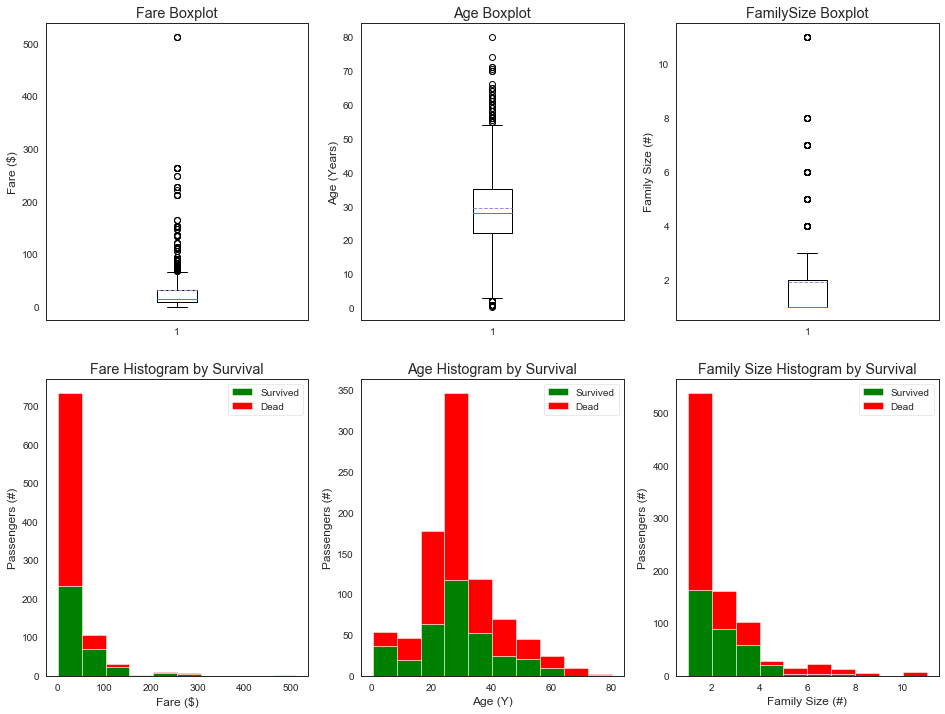

In [11]:
# Graph distribution of Individual Quantitative Features by survival

plt.figure(figsize=[16,12])

# Creating 2 rows, & 5 columns ready for plots (1 is the index meaning to start in left upper corner) 
# Boxplots are good to see outliers; Blue line is the median; Dashed line iss the mean
plt.subplot(231)
plt.boxplot(x=raw_train['Fare'], showmeans = True, meanline = True)
plt.title('Fare Boxplot')
plt.ylabel('Fare ($)')

plt.subplot(232)
plt.boxplot(raw_train['Age'], showmeans = True, meanline = True)
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')

plt.subplot(233)
plt.boxplot(raw_train['FamilySize'], showmeans = True, meanline = True)
plt.title('FamilySize Boxplot')
plt.ylabel('Family Size (#)')

# By providing a list to the plot as below, it creates different bars in colors for both!
plt.subplot(234)
plt.hist(x = [raw_train[raw_train['Survived'] == 1]['Fare'], raw_train[raw_train['Survived'] == 0]['Fare']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('Passengers (#)')
plt.legend()

plt.subplot(235)
plt.hist(x = [raw_train[raw_train['Survived'] == 1]['Age'], raw_train[raw_train['Survived'] == 0]['Age']],
        stacked=True, color=['g', 'r'], label=['Survived', 'Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age (Y)')
plt.ylabel('Passengers (#)')
plt.legend()

plt.subplot(236)
plt.hist(x = [raw_train[raw_train['Survived'] == 1]['FamilySize'], raw_train[raw_train['Survived'] == 0]['FamilySize']],
        stacked=True, color=['g', 'r'], label=['Survived', 'Dead'])
plt.title('Family Size Histogram by Survival')
plt.xlabel('Family Size (#)')
plt.ylabel('Passengers (#)')
plt.legend()

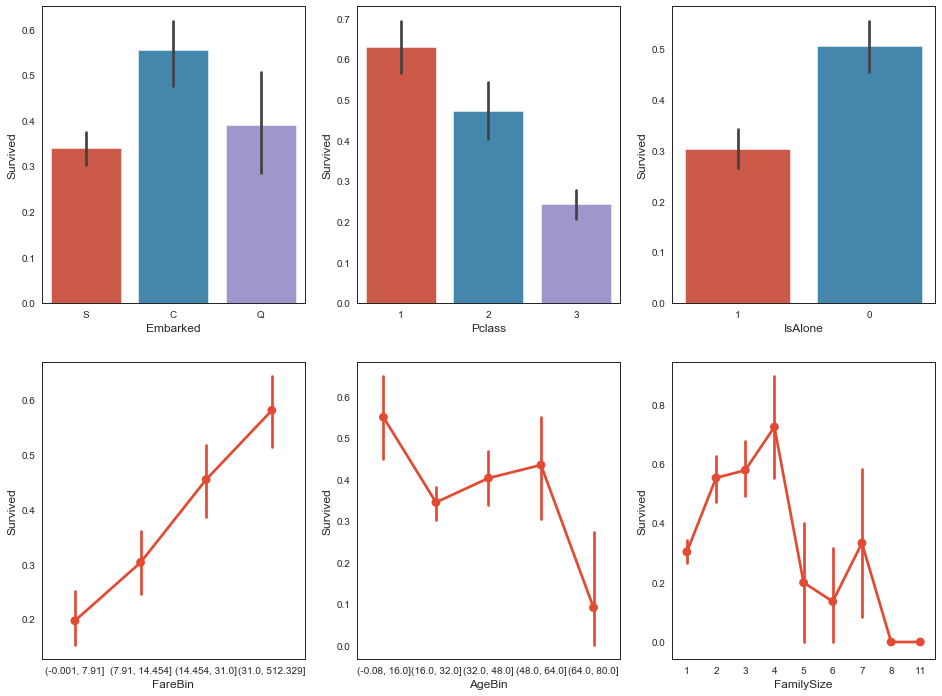

In [12]:
# Graph distribution of Individual Qualitative Features by survival

fig, saxis = plt.subplots(2, 3, figsize=(16,12))

sns.barplot(x='Embarked', y='Survived', data=raw_train, ax=saxis[0,0])
sns.barplot(x='Pclass', y='Survived', order=[1,2,3], data=raw_train, ax=saxis[0,1])
sns.barplot(x='IsAlone', y='Survived', order=[1,0], data=raw_train, ax=saxis[0,2])

sns.pointplot(x='FareBin', y='Survived', data=raw_train, ax=saxis[1,0])
sns.pointplot(x='AgeBin', y='Survived', data=raw_train, ax=saxis[1,1])
sns.pointplot(x='FamilySize', y='Survived', data=raw_train, ax=saxis[1,2])



Text(0.5, 1.0, 'Pclass vs FamilySize Survival Comparison')

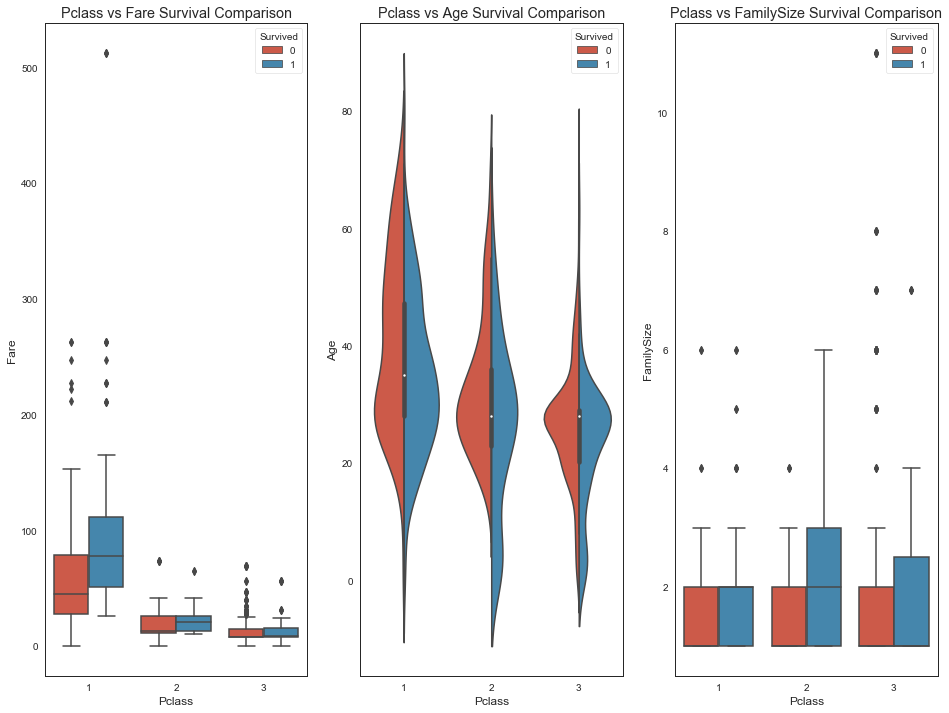

In [13]:
# Graph distribution of Qualitative data: Pclass

fig, saxis = plt.subplots(1, 3, figsize=(16,12))

sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=raw_train, ax=saxis[0])
saxis[0].set_title('Pclass vs Fare Survival Comparison')

sns.violinplot(x='Pclass', y='Age', hue='Survived', data=raw_train, split=True, ax=saxis[1])
saxis[1].set_title('Pclass vs Age Survival Comparison')

sns.boxplot(x='Pclass', y='FamilySize', hue='Survived', data=raw_train, ax=saxis[2])
saxis[2].set_title('Pclass vs FamilySize Survival Comparison')

Text(0.5, 1.0, 'Sex vs IsAlone Survival Comparison')

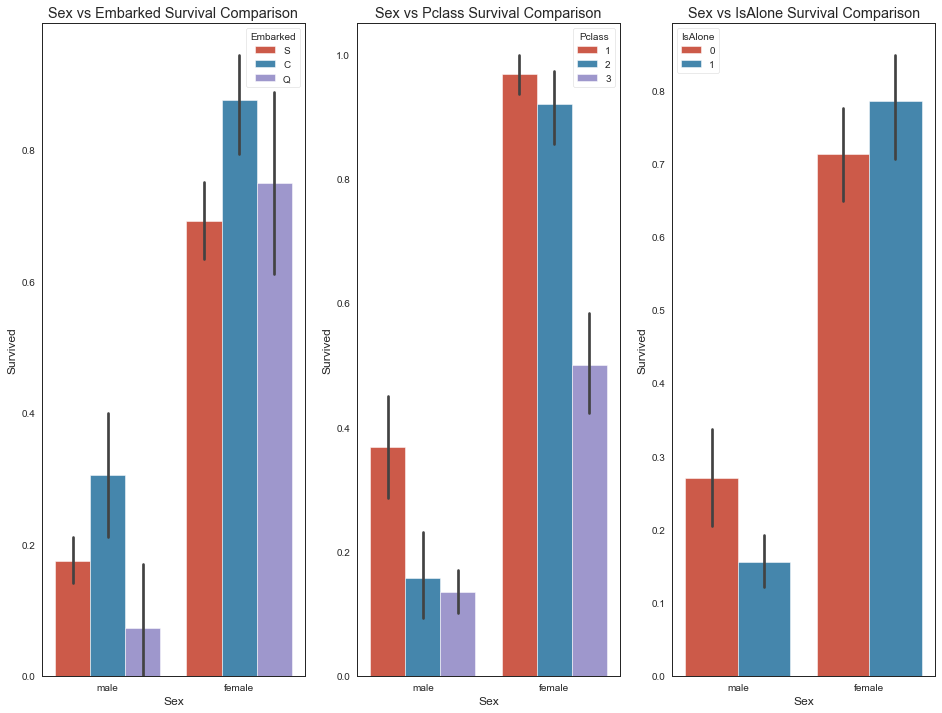

In [14]:
# Graph distribution of Qualitative data: Sex
# We know sex mattered in survival, now let's compare sex and a 2nd feature
# Note: One axis must be numeric, hence we use Survived as y axis

fig, saxis = plt.subplots(1, 3, figsize=(16,12))

sns.barplot(x='Sex', y='Survived', hue='Embarked', data=raw_train, ax=saxis[0])
saxis[0].set_title('Sex vs Embarked Survival Comparison')

sns.barplot(x='Sex', y='Survived', hue='Pclass', data=raw_train, ax=saxis[1])
saxis[1].set_title('Sex vs Pclass Survival Comparison')

sns.barplot(x='Sex', y='Survived', hue='IsAlone', data=raw_train, ax=saxis[2])
saxis[2].set_title('Sex vs IsAlone Survival Comparison')


# Observations: Females higher chance of survival if alone, while for men opposite was true
# C: Port for best survival chances

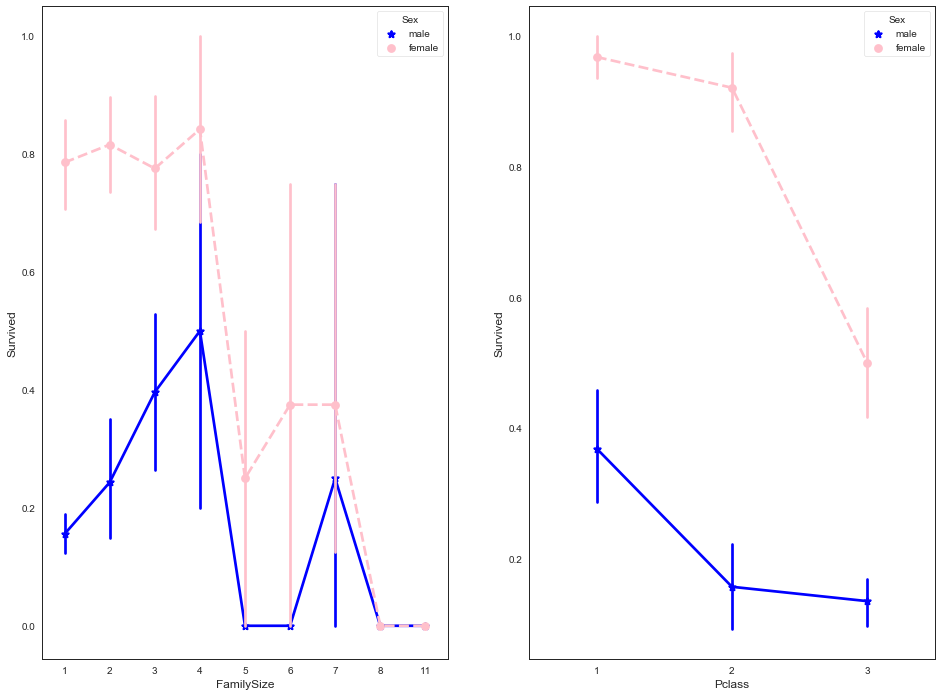

In [15]:

fig, saxis = plt.subplots(1, 2, figsize=(16,12))

sns.pointplot(x='FamilySize', y='Survived', hue='Sex', data=raw_train, palette={'male':'blue', 'female':'pink'},
              markers=['*', 'o'], linestyles=['-', '--'], ax=saxis[0])

sns.pointplot(x='Pclass', y='Survived', hue='Sex', data=raw_train, palette={'male':'blue', 'female':'pink'},
              markers=['*', 'o'], linestyles=['-', '--'], ax=saxis[1])

# Observations: For women PClass seems to have mattered a lot more for survival than for men..

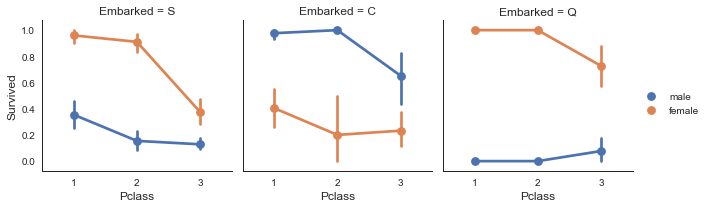

In [16]:
# Note: ci = confidence Interval – It determines how big the lines through the points are
# I.e. the higher the ci, the longer the line in order to be able to say this w/ e.g. 95% ci

e = sns.FacetGrid(raw_train, col='Embarked')
e.map(sns.pointplot, 'Pclass', 'Survived', 'Sex',  ci=95.0, palette='deep')
e.add_legend()

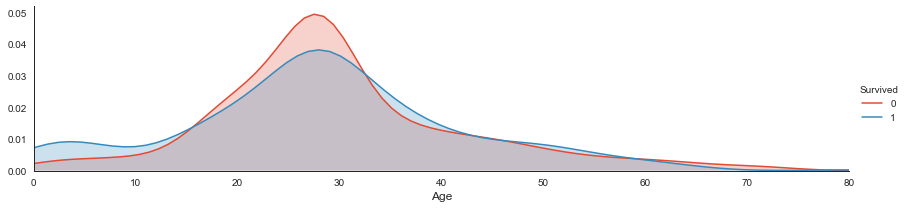

In [17]:
# The .set makes sure the x-axis goes from 0 to the max age aboard

a = sns.FacetGrid(raw_train, hue='Survived', aspect=4)
a.map(sns.kdeplot, 'Age', shade=True)
a.set(xlim=(0, raw_train['Age'].max()))
a.add_legend()

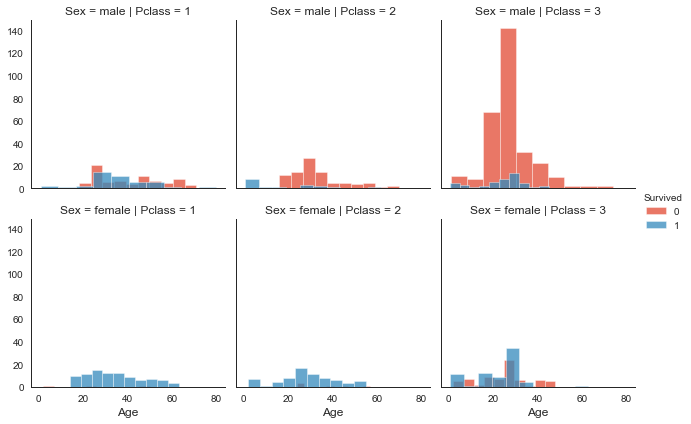

In [18]:
# Alpha adds transvisibility

h = sns.FacetGrid(raw_train, row='Sex', col='Pclass', hue='Survived')
h.map(plt.hist, 'Age', alpha=.75)
h.add_legend()

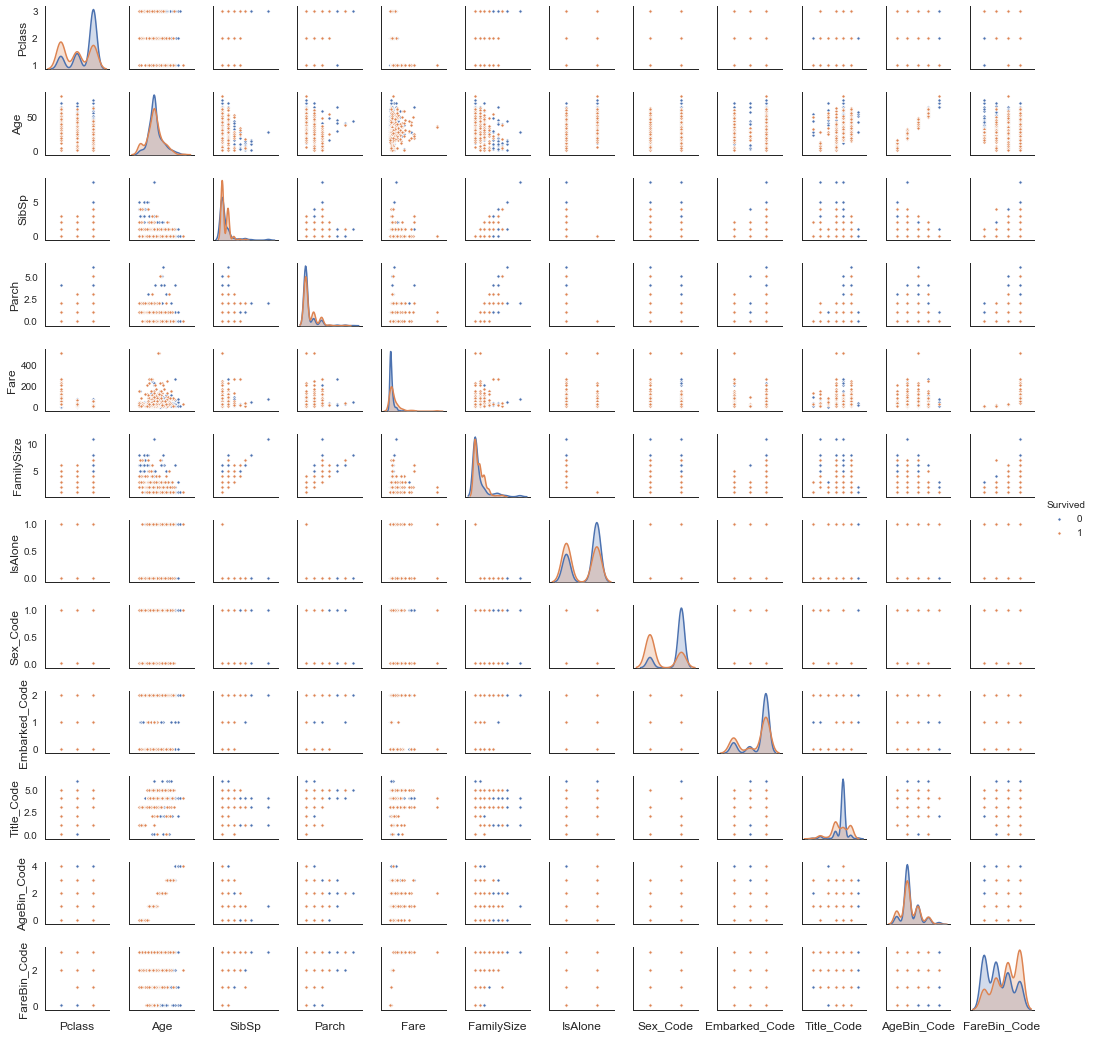

In [19]:
# Diag_kind defines the type of the diagonal plots
# plot_kws: dict which passed to the bivariate plottings (everything except diagonal)
# s stands for the size of the plotting items

pp = sns.pairplot(raw_train, hue='Survived', palette='deep', size=1.2, diag_kind='kde', 
                  diag_kws=dict(shade=True), plot_kws=dict(s=10))
pp.set(xticklabels=[])

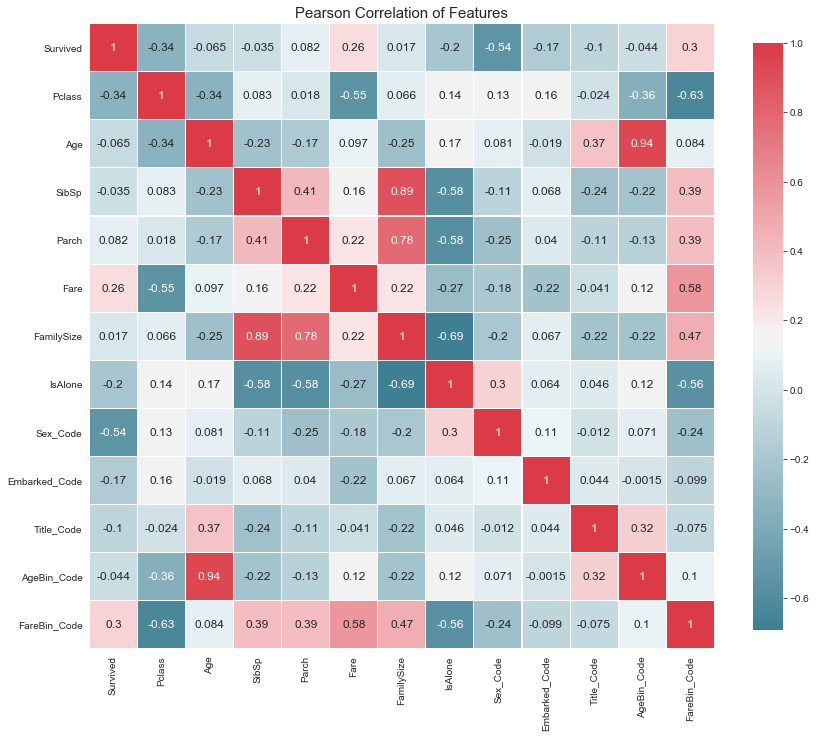

In [20]:
# HSL / HUSL: Hue, Saturation, Lighting

def correlation_heatmap(df):
    _, ax = plt.subplots(figsize=(14, 12))
    # as_cmap if True returns a visible palette instead of list of colors
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    
    _ = sns.heatmap(df.corr(), cmap=colormap, square=True, cbar_kws={'shrink':.9}, ax=ax, annot=True,
                   linewidths=0.1, vmax=1.0, linecolor='white', annot_kws={'fontsize':12})
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    
correlation_heatmap(raw_train)

## Step 5: Model Data

Data Science is a multi-disciplinary field between mathematics (i.e. statistics, linear algebra, etc.), computer science (i.e. programming languages, computer systems, etc.) and business management (i.e. communication, subject-matter knowledge, etc.). Most data scientist come from one of the three fields, so they tend to lean towards that discipline. However, data science is like a three-legged stool, with no one leg being more important than the other. So, this step will require advanced knowledge in mathematics.


There are many machine learning algorithms, however they can be reduced to four categories: classification (Decision trees), regression (NNs), clustering (K-means clustering), or dimensionality reduction (Principal component analysis), depending on your target variable and data modeling goals. 
As we know, [Logistic Regression is not a classification method, but a regression](https://www.fharrell.com/post/classification/). By adding a binary layer, however, we can use it for 1 / 0 classification.

Since our problem is predicting if a passenger survived or did not survive, this is a discrete target variable. We will use a classification algorithm from the *sklearn* library to begin our analysis. We will use cross validation and scoring metrics, discussed in later sections, to rank and compare our algorithms’ performance.

### Data Science 101: How to Choose a Machine Learning Algorithm (MLA)
**IMPORTANT:** When it comes to data modeling, the beginner’s question is always, "what is the best machine learning algorithm?" To this the beginner must learn, the [No Free Lunch Theorem (NFLT)](http://robertmarks.org/Classes/ENGR5358/Papers/NFL_4_Dummies.pdf) of Machine Learning. In short, NFLT states, there is no super algorithm, that works best in all situations, for all datasets. So the best approach is to try multiple MLAs, tune them, and compare them for your specific scenario. With that being said, some good research has been done to compare algorithms, such as [Caruana & Niculescu-Mizil 2006](https://www.cs.cornell.edu/~caruana/ctp/ct.papers/caruana.icml06.pdf) watch [video lecture here](https://www.youtube.com/watch?v=5lWPVYcJhRE) of MLA comparisons, [Ogutu et al. 2011](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3103196/) done by the NIH for genomic selection, [Fernandez-Delgado et al. 2014](http://jmlr.org/papers/volume15/delgado14a/delgado14a.pdf) comparing 179 classifiers from 17 families, [Thoma 2016 sklearn comparison](https://martin-thoma.com/comparing-classifiers/), and there is also a school of thought that says, [more data beats a better algorithm](https://www.kdnuggets.com/2015/06/machine-learning-more-data-better-algorithms.html). 

So with all this information, where is a beginner to start? I recommend starting with [Trees, Bagging, Random Forests, and Boosting](http://jessica2.msri.org/attachments/10778/10778-boost.pdf). They are basically different implementations of a decision tree, which is the easiest concept to learn and understand. They are also easier to tune, discussed in the next section, than something like SVC. Below, I'll give an overview of how-to run and compare several MLAs, but the rest of this Kernel will focus on learning data modeling via decision trees and its derivatives.

In [21]:
# MLA: Machine Learning Algorithms – Selection & Initialization

MLA = [
    # Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    
    # Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    # GLM - Generalized Linear Models
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    # Naive Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    # Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    # SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    # Trees
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    # Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
    
    XGBClassifier()  
    ]

#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split

# Split model – intentionally leaving ou 10% // n_splits is how many CV splits we'll have - i.e. we will train it on 10 splits
cv_split = model_selection.ShuffleSplit(n_splits=10, test_size=.3, train_size=.6, random_state=0)

MLA_columns = ['MLA Name', 'MLA Parameters', 'MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 
               'MLA Test Accuracy 3*STD', 'MLA Time']
MLA_compare = pd.DataFrame(columns=MLA_columns)

# Table to compare MLA predictions
MLA_predict = raw_train[Target]

# Index through MLA & save performance to table
row_index = 0

# In the below call, we're raining the models twice (once in the cv, once in .fit) 
# The CV serves to find the right model, the .fit serves to train the model for use 
# To save computation, we could only use CV in the loop and then just fit the model we chose outside of the loop
for alg in MLA:
    
    # Set name & params
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    # Score model with Cross Validation
    cv_results = model_selection.cross_validate(alg, raw_train[data_X_bin], raw_train[Target], 
                                                cv=cv_split, return_train_score=True, return_estimator=True)
    # cv_results = model_selection.cross_validate(alg, data1[data1_x_bin], data1[Target], cv  = cv_split)
    
    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean() 
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean() 
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean() 
    # If this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, 
    # should statistically capture 99.7% of the subsets; It gives us the worst that can happen
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std() * 3
    
    # Save MLA predictions
    alg.fit(raw_train[data_X_bin], raw_train[Target])
    MLA_predict[MLA_name] = alg.predict(raw_train[data_X_bin])
    
    row_index += 1
    
    
MLA_compare.sort_values(by=['MLA Test Accuracy Mean'], ascending=False, inplace=True)
MLA_compare

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
21,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.853933,0.827612,0.0579068,0.118395
15,NuSVC,"{'break_ties': False, 'cache_size': 200, 'clas...",0.833895,0.827239,0.0433687,0.17099
14,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.834644,0.826493,0.0445657,0.0977716
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.895131,0.825373,0.058338,0.532749
18,ExtraTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.895131,0.823134,0.053964,0.00705819
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.891011,0.822761,0.0685034,0.0603576
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",0.895131,0.821642,0.0636782,0.38254
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.866105,0.821642,0.0471746,0.243466
17,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.895131,0.81791,0.0606547,0.00757461
20,QuadraticDiscriminantAnalysis,"{'priors': None, 'reg_param': 0.0, 'store_cova...",0.824532,0.811567,0.0766198,0.00656023


Text(0, 0.5, 'Algorithm')

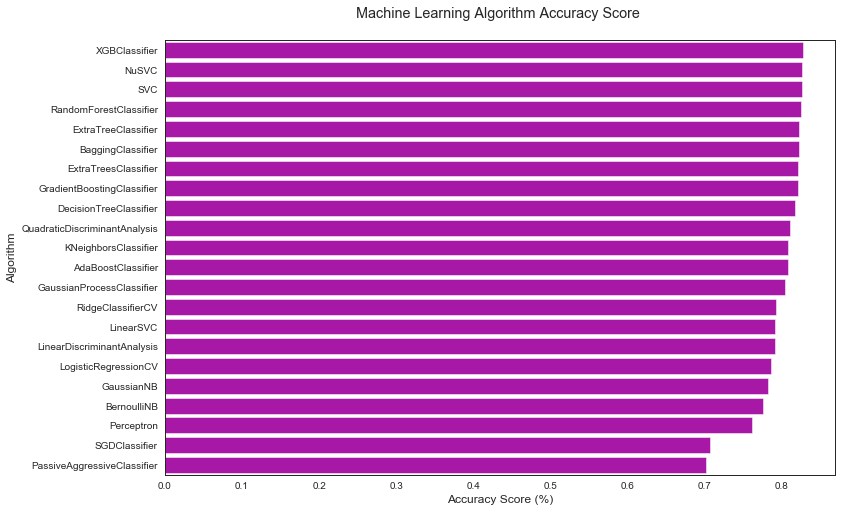

In [22]:
sns.barplot(x='MLA Test Accuracy Mean', y='MLA Name', data=MLA_compare, color='m')

plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

## 5.1.1 Evaluate Model Performance

Let's recap, with some basic data cleaning, analysis, and machine learning algorithms (MLA), we are able to predict passenger survival with ~82% accuracy. Not bad for a few lines of code. But the question we always ask is, can we do better and more importantly get an ROI (return on investment) for our time invested? For example, if we're only going to increase our accuracy by 1/10th of a percent, is it really worth 3-months of development. If you work in research maybe the answer is yes, but if you work in business mostly the answer is no. So, keep that in mind when improving your model.

### Data Science 101: Determine a Baseline Accuracy ###
Before we decide how-to make our model better, let's determine if our model is even worth keeping. To do that, we have to go back to the basics of data science 101. We know this is a binary problem, because there are only two possible outcomes; passengers survived or died. So, think of it like a coin flip problem. If you have a fair coin and you guessed heads or tail, then you have a 50-50 chance of guessing correct. So, let's set 50% as the worst model performance; because anything lower than that, then why do I need you when I can just flip a coin?

Okay, so with no information about the dataset, we can always get 50% with a binary problem. But we have information about the dataset, so we should be able to do better. We know that 1,502/2,224 or 67.5% of people died. Therefore, if we just predict the most frequent occurrence, that 100% of people died, then we would be right 67.5% of the time. So, let's set **68%** as bad model performance, because again, anything lower than that, then why do I need you, when I can just predict using the most frequent occurrence.

### Data Science 101: How-to Create Your Own Model ###
Our accuracy is increasing, but can we do better? Are there any signals in our data? To illustrate this, we're going to build our own decision tree model, because it is the easiest to conceptualize and requires simple addition and multiplication calculations. When creating a decision tree, you want to ask questions that segment your target response, placing the survived/1 and dead/0 into homogeneous subgroups. This is part science and part art, so let's just play the 21-question game to show you how it works. If you want to follow along on your own, download the train dataset and import into Excel. Create a pivot table with survival in the columns, count and % of row count in the values, and the features described below in the rows.

Remember, the name of the game is to create subgroups using a decision tree model to get survived/1 in one bucket and dead/0 in another bucket. Our rule of thumb will be the majority rules. Meaning, if the majority or 50% or more survived, then everybody in our subgroup survived/1, but if 50% or less survived then if everybody in our subgroup died/0. Also, we will stop if the subgroup is less than 10 and/or our model accuracy plateaus or decreases. Got it? Let's go! (See tree.xlsx for the Excel execution)

***Question 1: Were you on the Titanic?*** If Yes, then majority (62%) died. Note our sample survival is different than our population of 68%. Nonetheless, if we assumed everybody died, our sample accuracy is 62%.

***Question 2: Are you male or female?*** Male, majority (81%) died. Female, majority (74%) survived. Giving us an accuracy of 79%.

***Question 3A (going down the female branch with count = 314): Are you in class 1, 2, or 3?*** Class 1, majority (97%) survived and Class 2, majority (92%) survived. Since the dead subgroup is less than 10, we will stop going down this branch. Class 3, is even at a 50-50 split. No new information to improve our model is gained.

***Question 4A (going down the female class 3 branch with count = 144): Did you embark from port C, Q, or S?*** We gain a little information. C and Q, the majority still survived, so no change. Also, the dead subgroup is less than 10, so we will stop. S, the majority (63%) died. So, we will change females, class 3, embarked S from assuming they survived, to assuming they died. Our model accuracy increases to 81%. 

***Question 5A (going down the female class 3 embarked S branch with count = 88):*** So far, it looks like we made good decisions. Adding another level does not seem to gain much more information. This subgroup 55 died and 33 survived, since majority died we need to find a signal to identify the 33 or a subgroup to change them from dead to survived and improve our model accuracy. We can play with our features. One I found was fare 0-8, majority survived. It's a small sample size 11-9, but one often used in statistics. We slightly improve our accuracy, but not much to move us past 82%. So, we'll stop here.

***Question 3B (going down the male branch with count = 577):*** Going back to question 2, we know the majority of males died. So, we are looking for a feature that identifies a subgroup that majority survived. Surprisingly, class or even embarked didn't matter like it did for females, but title does and gets us to 82%. Guess and checking other features, none seem to push us past 82%. So, we'll stop here for now.

You did it, with very little information, we get to 82% accuracy. On a worst, bad, good, better, and best scale, we'll set 82% to good, since it's a simple model that yields us decent results. But the question still remains, can we do better than our handmade model? 

Before we do, let's code what we just wrote above. Please note, this is a manual process created by "hand." You won't have to do this, but it's important to understand it before you start working with MLA. Think of MLA like a TI-89 calculator on a Calculus Exam. It's very powerful and helps you with a lot of the grunt work. But if you don't know what you're doing on the exam, a calculator, even a TI-89, is not going to help you pass. So, study the next section wisely.

Reference: [Cross-Validation and Decision Tree Tutorial](http://www.cs.utoronto.ca/~fidler/teaching/2015/slides/CSC411/tutorial3_CrossVal-DTs.pdf)



In [23]:

# Iterrows allows to iterate over df and yields an index & a row
for index, row in raw_train.iterrows():
    
    if random.random() > .5: 
        raw_train.at[index, 'Random_Predict'] = 1
    else:
        raw_train.at[index, 'Random_Predict'] = 0
        

raw_train['Random_Score'] = 0
raw_train.loc[(raw_train['Random_Predict'] == raw_train['Survived']), 'Random_Score'] = 1
print('Coin Flip Accuracy = ', raw_train['Random_Score'].mean())
print('Accuracy via sckit = ', metrics.accuracy_score(raw_train['Survived'], raw_train['Random_Predict']))

Coin Flip Accuracy =  0.5173961840628507
Accuracy via sckit =  0.5173961840628507


In [24]:

pivot_female = raw_train[raw_train.Sex == 'female'].groupby(['Sex', 'Pclass', 'Embarked', 'FareBin'])['Survived'].mean()
print('Survival Decision Tree w/ Female Node: \n', pivot_female)

pivot_male = raw_train[raw_train.Sex == 'male'].groupby(['Sex', 'Title'])['Survived'].mean()
print('Survival Decision Tree w/ Male Node: \n', pivot_male)

Survival Decision Tree w/ Female Node: 
 Sex     Pclass  Embarked  FareBin        
female  1       C         (-0.001, 7.91]          NaN
                          (7.91, 14.454]          NaN
                          (14.454, 31.0]     0.666667
                          (31.0, 512.329]    1.000000
                Q         (-0.001, 7.91]          NaN
                          (7.91, 14.454]          NaN
                          (14.454, 31.0]          NaN
                          (31.0, 512.329]    1.000000
                S         (-0.001, 7.91]          NaN
                          (7.91, 14.454]          NaN
                          (14.454, 31.0]     1.000000
                          (31.0, 512.329]    0.955556
        2       C         (-0.001, 7.91]          NaN
                          (7.91, 14.454]     1.000000
                          (14.454, 31.0]     1.000000
                          (31.0, 512.329]    1.000000
                Q         (-0.001, 7.91]          NaN

In [25]:
def mytree(df):
    
    Model = pd.DataFrame(data = {'Predict':[]})

    for index, row in df.iterrows():
        
        # Q: Were you on the Titanic? // Majority died
        Model.loc[index, 'Predict'] = 0
        
        
        # Q: Were you female? // Majority survived
        if df.loc[index, 'Sex'] == 'female':
            Model.loc[index, 'Predict'] = 1
            
        # Q: FareBin? // Set female back to zero for special case
        if ((df.loc[index, 'Sex'] == 'female') &
            (df.loc[index, 'Pclass'] == 3) &
            (df.loc[index, 'Embarked'] == 'S') &
            (df.loc[index, 'Fare'] > 8)):
            
            Model.loc[index, 'Predict'] = 0
            
        # Q: Male & Title? // Set male w/ Master title to 1
        if ((df.loc[index, 'Sex'] == 'male') &
            (df.loc[index, 'Title'] == 'Master')):
            
            Model.loc[index, 'Predict'] = 1
            
    return Model
            
    
Tree_Predict = mytree(raw_train)
print('Accuracy via sckit = ', metrics.accuracy_score(raw_train['Survived'], Tree_Predict['Predict']), '\n')
print(metrics.classification_report(raw_train['Survived'], Tree_Predict['Predict']))

Accuracy via sckit =  0.8204264870931538 

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       549
           1       0.82      0.68      0.75       342

    accuracy                           0.82       891
   macro avg       0.82      0.79      0.80       891
weighted avg       0.82      0.82      0.82       891



Non-normalized Confusion Matrix
[[497  52]
 [108 234]]
Normalized Confusion Matrix
[[0.91 0.09]
 [0.32 0.68]]


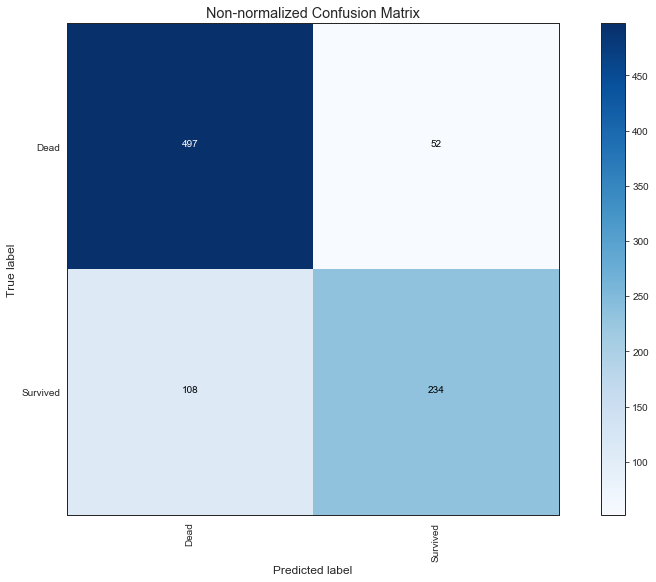

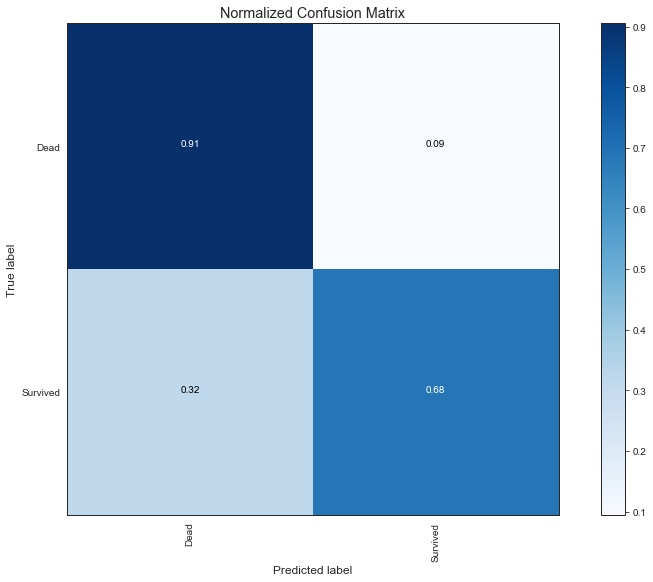

In [26]:

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    '''
    Prints & Plots confusion matrix. 
    Normalization applied by setting normalize=True
    '''
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Non-normalized Confusion Matrix')
        
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
# Compute Conf Matrix
cnf_matrix = metrics.confusion_matrix(raw_train['Survived'], Tree_Predict)
# Only two digits of precision for np objects
np.set_printoptions(precision=2)

class_names = ['Dead', 'Survived']

plt.figure()
plot_confusion_matrix(cnf_matrix, class_names, normalize=False, title='Non-normalized Confusion Matrix')
   
plt.figure()
plot_confusion_matrix(cnf_matrix, class_names, normalize=True, title='Normalized Confusion Matrix')
    
    
# Sensitivity of 91% = Recall(0)
# Specificity of 68% = Recall(1)

## 5.1.2 Model Performance with Cross-Validation (CV)
In step 5.0, we used [sklearn cross_validate](http://scikit-learn.org/stable/modules/cross_validation.html#multimetric-cross-validation) function to train, test, and score our model performance.

Remember, it's important we use a different subset for train data to build our model and test data to evaluate our model. Otherwise, our model will be overfitted. Meaning it's great at "predicting" data it's already seen, but terrible at predicting data it has not seen; which is not prediction at all. It's like cheating on a school quiz to get 100%, but then when you go to take the exam, you fail because you never truly learned anything. The same is true with machine learning.

CV is basically a shortcut to split and score our model multiple times, so we can get an idea of how well it will perform on unseen data. It’s a little more expensive in computer processing, but it's important so we don't gain false confidence. This is helpful in a Kaggle Competition or any use case where consistency matters and surprises should be avoided.
 
In addition to CV, we used a customized [sklearn train test splitter](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection), to allow a little more randomness in our test scoring.

# 5.1.3 Tune Model with Hyper-Parameters
When we used [sklearn Decision Tree (DT) Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier), we accepted all the function defaults. This leaves opportunity to see how various hyper-parameter settings will change the model accuracy.  [(Click here to learn more about parameters vs hyper-parameters.)](https://www.youtube.com/watch?v=EJtTNboTsm8)

However, in order to tune a model, we need to actually understand it. That's why I took the time in the previous sections to show you how predictions work. Now let's learn a little bit more about our DT algorithm.

Credit: [sklearn](http://scikit-learn.org/stable/modules/tree.html#classification)

>**Some advantages of decision trees are:**
* Simple to understand and to interpret. Trees can be visualized.
* Requires little data preparation. Other techniques often require data normalization, dummy variables need to be created and blank values to be removed. Note however that this module does not support missing values.
* The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.
* Able to handle both numerical and categorical data. Other techniques are usually specialized in analyzing datasets that have only one type of variable. See algorithms for more information.
* Able to handle multi-output problems.
* Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by Boolean logic. By contrast, in a black box model (e.g., in an artificial neural network), results may be more difficult to interpret.
* Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model.
* Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.

> **The disadvantages of decision trees include:**
* Decision-tree learners can create over-complex trees that do not generalize the data well. This is called overfitting. Mechanisms such as pruning (not currently supported), setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.
* Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.
* The problem of learning an optimal decision tree is known to be NP-complete under several aspects of optimality and even for simple concepts. Consequently, practical decision-tree learning algorithms are based on heuristic algorithms such as the greedy algorithm where locally optimal decisions are made at each node. Such algorithms cannot guarantee to return the globally optimal decision tree. This can be mitigated by training multiple trees in an ensemble learner, where the features and samples are randomly sampled with replacement.
* There are concepts that are hard to learn because decision trees do not express them easily, such as XOR, parity or multiplexer problems.
* Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.



Below are available hyper-parameters and [defintions](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier):
> class sklearn.tree.DecisionTreeClassifier(criterion=’gini’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)


We will tune our model using [ParameterGrid](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ParameterGrid.html#sklearn.model_selection.ParameterGrid), [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV), and customized [sklearn scoring](http://scikit-learn.org/stable/modules/model_evaluation.html); [click here to learn more about ROC_AUC scores](http://www.dataschool.io/roc-curves-and-auc-explained/). We will then visualize our tree with [graphviz](http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html#sklearn.tree.export_graphviz). [Click here to learn more about ROC_AUC scores](http://www.dataschool.io/roc-curves-and-auc-explained/).


In [27]:

dtree = tree.DecisionTreeClassifier(random_state=0)
base_results = model_selection.cross_validate(dtree, raw_train[data_X_bin], raw_train[Target], cv=cv_split, return_train_score=True)
dtree.fit(raw_train[data_X_bin], raw_train[Target])

print('BEFORE DT Parameters: ', dtree.get_params())
print('BEFORE DT Training w/bin score mean: {:.2f}'.format(base_results['train_score'].mean()*100)) 
print('BEFORE DT Test w/bin score mean: {:.2f}'.format(base_results['test_score'].mean()*100))
print('BEFORE DT Test w/bin score 3*std: +/- {:.2f}'.format(base_results['test_score'].std()*100*3))
print('-'*10)

param_grid = {'criterion': ['gini', 'entropy'],
             'max_depth': [2, 4, 6, 8, 10, None],
             'random_state': [0]}

tune_model = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), param_grid, scoring='roc_auc', cv=cv_split, return_train_score=True)
tune_model.fit(raw_train[data_X_bin], raw_train[Target])


print('AFTER DT Parameters: ', tune_model.best_params_)
print("AFTER DT Training w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100)) 
print("AFTER DT Test w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print("AFTER DT Test w/bin score 3*std: +/- {:.2f}". format(tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))
print('-'*10)



BEFORE DT Parameters:  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 0, 'splitter': 'best'}
BEFORE DT Training w/bin score mean: 89.51
BEFORE DT Test w/bin score mean: 81.87
BEFORE DT Test w/bin score 3*std: +/- 5.76
----------
AFTER DT Parameters:  {'criterion': 'gini', 'max_depth': 4, 'random_state': 0}
AFTER DT Training w/bin score mean: 89.40
AFTER DT Test w/bin score mean: 86.98
AFTER DT Test w/bin score 3*std: +/- 7.04
----------


## 5.1.4 Tune Model with Feature Selection
More predictor variables do not make a better model, but the right predictors do. So another step in data modeling is feature selection. [Sklearn](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) has several options, we will use [recursive feature elimination (RFE) with cross validation (CV)](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html#sklearn.feature_selection.RFECV).

In [28]:
# Base model
print('BEFORE DT RFE Training Shape Old: ', raw_train[data_X_bin].shape) 
print('BEFORE DT RFE Training Columns Old: ', raw_train[data_X_bin].columns.values)

print("BEFORE DT RFE Training w/bin score mean: {:.2f}". format(base_results['train_score'].mean()*100)) 
print("BEFORE DT RFE Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print("BEFORE DT RFE Test w/bin score 3*std: +/- {:.2f}". format(base_results['test_score'].std()*100*3))
print('-'*10)

# Feature Selection
dtree_rfe = feature_selection.RFECV(dtree, step=1, scoring='accuracy', cv=cv_split)
dtree_rfe.fit(raw_train[data_X_bin], raw_train[Target])

# Get the selected features via get support and build an X w/ only those from raw 
X_rfe = raw_train[data_X_bin].columns.values[dtree_rfe.get_support()]
# Fit new model w/ only those ftrs and check its results via CV
rfe_results = model_selection.cross_validate(dtree, raw_train[X_rfe], raw_train[Target], cv=cv_split, 
                                             return_train_score=True)

print('AFTER DT RFE Training Shape New: ', raw_train[X_rfe].shape) 
print('AFTER DT RFE Training Columns New: ', X_rfe)

print("AFTER DT RFE Training w/bin score mean: {:.2f}". format(rfe_results['train_score'].mean()*100)) 
print("AFTER DT RFE Test w/bin score mean: {:.2f}". format(rfe_results['test_score'].mean()*100))
print("AFTER DT RFE Test w/bin score 3*std: +/- {:.2f}". format(rfe_results['test_score'].std()*100*3))
print('-'*10)


# Tune RFE model for ultimate perfection
rfe_tune_model = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), param_grid, scoring='roc_auc', cv=cv_split,
                                             return_train_score=True)
rfe_tune_model.fit(raw_train[X_rfe], raw_train[Target])

print('AFTER DT RFE TUNE Parameters: ', rfe_tune_model.best_params_)
print("AFTER DT RFE TUNE Training w/bin score mean: {:.2f}". format(rfe_tune_model.cv_results_['mean_train_score'][rfe_tune_model.best_index_]*100)) 
print("AFTER DT Test w/bin score mean: {:.2f}". format(rfe_tune_model.cv_results_['mean_test_score'][rfe_tune_model.best_index_]*100))
print("AFTER DT Test w/bin score 3*std: +/- {:.2f}". format(rfe_tune_model.cv_results_['std_test_score'][rfe_tune_model.best_index_]*100*3))
print('-'*10)

BEFORE DT RFE Training Shape Old:  (891, 7)
BEFORE DT RFE Training Columns Old:  ['Sex_Code' 'Pclass' 'Embarked_Code' 'Title_Code' 'FamilySize'
 'AgeBin_Code' 'FareBin_Code']
BEFORE DT RFE Training w/bin score mean: 89.51
BEFORE DT RFE Test w/bin score mean: 81.87
BEFORE DT RFE Test w/bin score 3*std: +/- 5.76
----------
AFTER DT RFE Training Shape New:  (891, 6)
AFTER DT RFE Training Columns New:  ['Sex_Code' 'Pclass' 'Title_Code' 'FamilySize' 'AgeBin_Code'
 'FareBin_Code']
AFTER DT RFE Training w/bin score mean: 88.16
AFTER DT RFE Test w/bin score mean: 82.72
AFTER DT RFE Test w/bin score 3*std: +/- 6.33
----------
AFTER DT RFE TUNE Parameters:  {'criterion': 'entropy', 'max_depth': 4, 'random_state': 0}
AFTER DT RFE TUNE Training w/bin score mean: 89.27
AFTER DT Test w/bin score mean: 86.70
AFTER DT Test w/bin score 3*std: +/- 6.85
----------


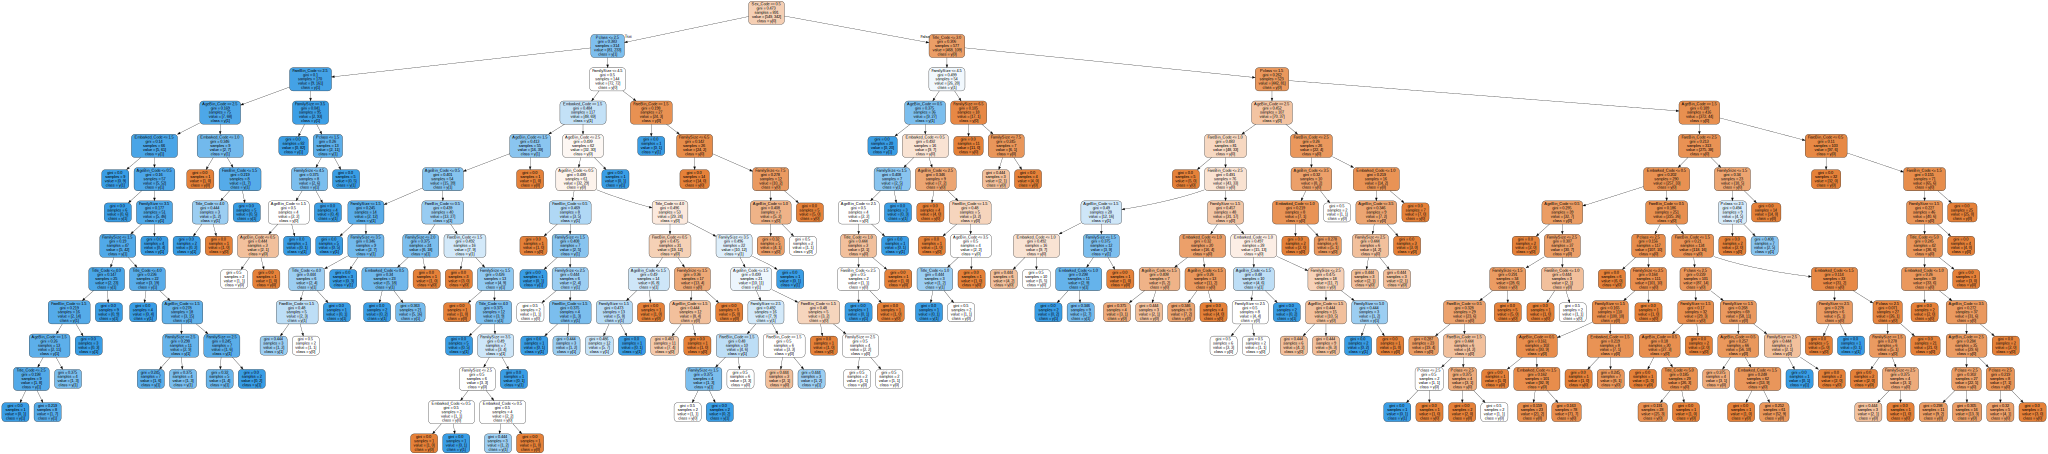

In [30]:
# Get dot representation of dtree as string
dot_data = tree.export_graphviz(dtree, out_file=None, feature_names=data_X_bin, class_names=True, filled=True, 
                               rounded=True)

graph = graphviz.Source(dot_data)
graph

# Step 6: Validate and Implement
The next step is to prepare for submission using the validation data. 

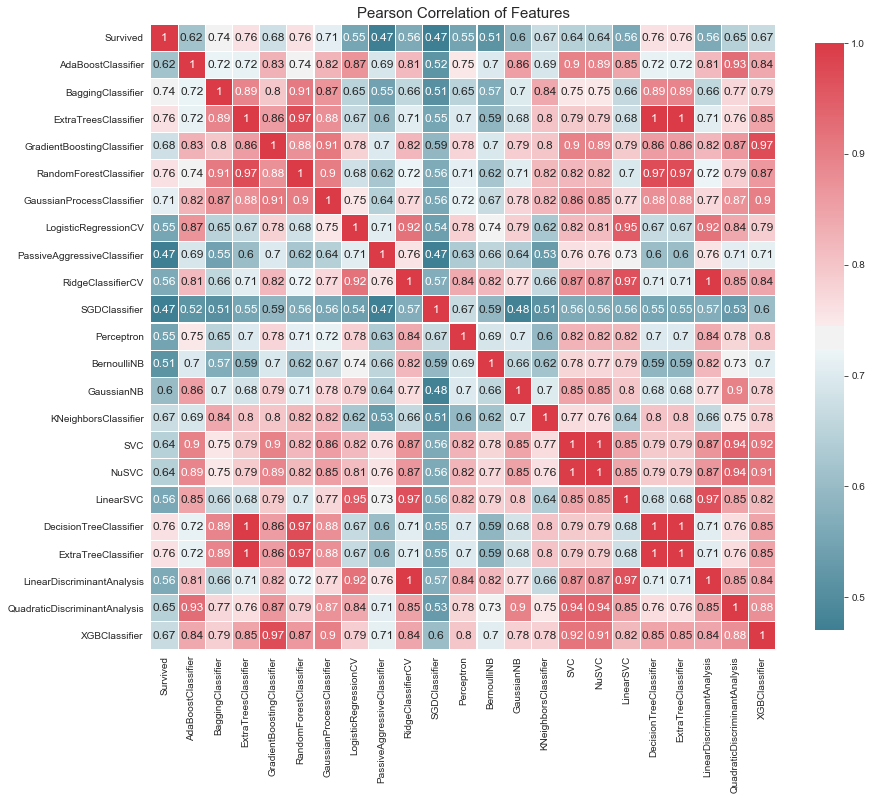

In [31]:
# Comparing Algo predictions
# The blue & light red fields could serve to merge algo's for super classifiers
correlation_heatmap(MLA_predict)

In [32]:
# VotingClassifier to pick among models
# Keeping only models which have predict_proba attribute (required for VC) & do not have a 1 correlation w/ another

vote_est = [
    ('ada', ensemble.AdaBoostClassifier()),
    ('bc', ensemble.BaggingClassifier()),
    ('etc',ensemble.ExtraTreesClassifier()),
    ('gbc', ensemble.GradientBoostingClassifier()),
    ('rfc', ensemble.RandomForestClassifier()),
    
    ('gpc', gaussian_process.GaussianProcessClassifier()),
    
    ('lr', linear_model.LogisticRegressionCV()),
    
    ('bnb', naive_bayes.BernoulliNB()),
    ('gnb', naive_bayes.GaussianNB()),
    
    ('knn', neighbors.KNeighborsClassifier()),
    
    ('svc', svm.SVC(probability=True)), # 1 correlation w/ NuSVC
    
    ('xgb', XGBClassifier())   
]

# Hard Vote // Using the predicted labels
vote_hard = ensemble.VotingClassifier(vote_est, voting='hard')
vote_hard_cv = model_selection.cross_validate(vote_hard, raw_train[data_X_bin],
                                              raw_train[Target], cv=cv_split, return_train_score=True)
vote_hard.fit(raw_train[data_X_bin], raw_train[Target])

print("Hard Voting Training w/bin score mean: {:.2f}". format(vote_hard_cv['train_score'].mean()*100)) 
print("Hard Voting Test w/bin score mean: {:.2f}". format(vote_hard_cv['test_score'].mean()*100))
print("Hard Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_hard_cv['test_score'].std()*100*3))
print('-'*10)

# Soft Vote // Using the predicted probas [Recommended]
vote_soft = ensemble.VotingClassifier(vote_est, voting='soft')
vote_soft_cv = model_selection.cross_validate(vote_soft, raw_train[data_X_bin],
                                              raw_train[Target], cv=cv_split, return_train_score=True)
vote_soft.fit(raw_train[data_X_bin], raw_train[Target])

print("Soft Voting Training w/bin score mean: {:.2f}". format(vote_soft_cv['train_score'].mean()*100)) 
print("Soft Voting Test w/bin score mean: {:.2f}". format(vote_soft_cv['test_score'].mean()*100))
print("Soft Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_soft_cv['test_score'].std()*100*3))
print('-'*10)


Hard Voting Training w/bin score mean: 86.50
Hard Voting Test w/bin score mean: 82.16
Hard Voting Test w/bin score 3*std: +/- 4.95
----------
Soft Voting Training w/bin score mean: 87.06
Soft Voting Test w/bin score mean: 82.31
Soft Voting Test w/bin score 3*std: +/- 4.48
----------


In [50]:
print(raw_test.info())
print("-"*10)


raw_test['Survived_MyTree'] = mytree(raw_test).astype('int32')

raw_test['Survived'] = vote_soft.predict(raw_test[data_X_bin])

submit = raw_test[['PassengerId', 'Survived']]
submit['Survived'] = raw_test['Survived_MyTree']
submit.to_csv('submit3.csv', index=False)

print('Test Data Distribution', raw_train['Survived'].value_counts(normalize=True))
print("-"*10)
print('Validation Data Distribution: ', submit['Survived'].value_counts(normalize=True))
submit.head(10)


# Scores:
# vote_soft: 78.947
# vote_hard: 78.468
# handmade: 77.990

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   PassengerId      418 non-null    int64   
 1   Pclass           418 non-null    int64   
 2   Name             418 non-null    object  
 3   Sex              418 non-null    object  
 4   Age              418 non-null    float64 
 5   SibSp            418 non-null    int64   
 6   Parch            418 non-null    int64   
 7   Ticket           418 non-null    object  
 8   Fare             418 non-null    float64 
 9   Cabin            91 non-null     object  
 10  Embarked         418 non-null    object  
 11  FamilySize       418 non-null    int64   
 12  IsAlone          418 non-null    int64   
 13  Title            418 non-null    object  
 14  FareBin          418 non-null    category
 15  AgeBin           418 non-null    category
 16  Sex_Code         418 non-null    int64   
 1

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


# 7. Optimize & Strategize


With iteration on, we achieved an accuracy of 78.947%. The strong difference between our validation set and the test set, probably comes from a slightly different underlying distribution. For further optimization:

Bayes Error: There is likely to be some randomness involved and having already surpassed human performance (our handcrafted model at 77.9%), Bayes Error might not be too far. Looking at other submissions on Kaggle ~90% might be a good estimate.
X: 3%
Training Error: Our training error for the soft voting classifier is currently at 87.06%.
X: 4.706%
Validation Error: Our validation error for the same is at 82.31%
X: 3.36%
Test Error: Our test error is as mentioned at 78.95%.


The highest difference exists between our training & validation errors, hence it would be reasonable to focus on improving the validation accuracy. This could be done by implementing anti-overfitting measures and improve generalization.


## Conclusion

See other notebooks in folders for additional input.

- When comparing models, make sure you compare apples to apples:
    - Fitting on train or full dataset?
    - Same scoring method? (F1, ROC AUC...)
    - Same randomstate for selection of train & test data?

